This dataset contains 48 features extracted from 5000 phishing webpages and 5000 legitimate webpages, which were downloaded from January to May 2015 and from May to June 2017

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [185]:
pwd

'C:\\Users\\trini\\DMML_project\\codes'

In [186]:
dataset = pd.read_csv("C:\\Users\\trini\\DMML_project\\Datasets\\Phishing_Legitimate_full.csv")
dataset

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [187]:
df = dataset.copy()
df

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [188]:
# check for null values
df.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [189]:
# check for duplicate values in the dataset
df=df.drop_duplicates(ignore_index=True)
df

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [190]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [191]:
df.dtypes

id                                      int64
NumDots                                 int64
SubdomainLevel                          int64
PathLevel                               int64
UrlLength                               int64
NumDash                                 int64
NumDashInHostname                       int64
AtSymbol                                int64
TildeSymbol                             int64
NumUnderscore                           int64
NumPercent                              int64
NumQueryComponents                      int64
NumAmpersand                            int64
NumHash                                 int64
NumNumericChars                         int64
NoHttps                                 int64
RandomString                            int64
IpAddress                               int64
DomainInSubdomains                      int64
DomainInPaths                           int64
HttpsInHostname                         int64
HostnameLength                    

Drop the index column because that acts as a primary key and has no significance in EDA and modelling

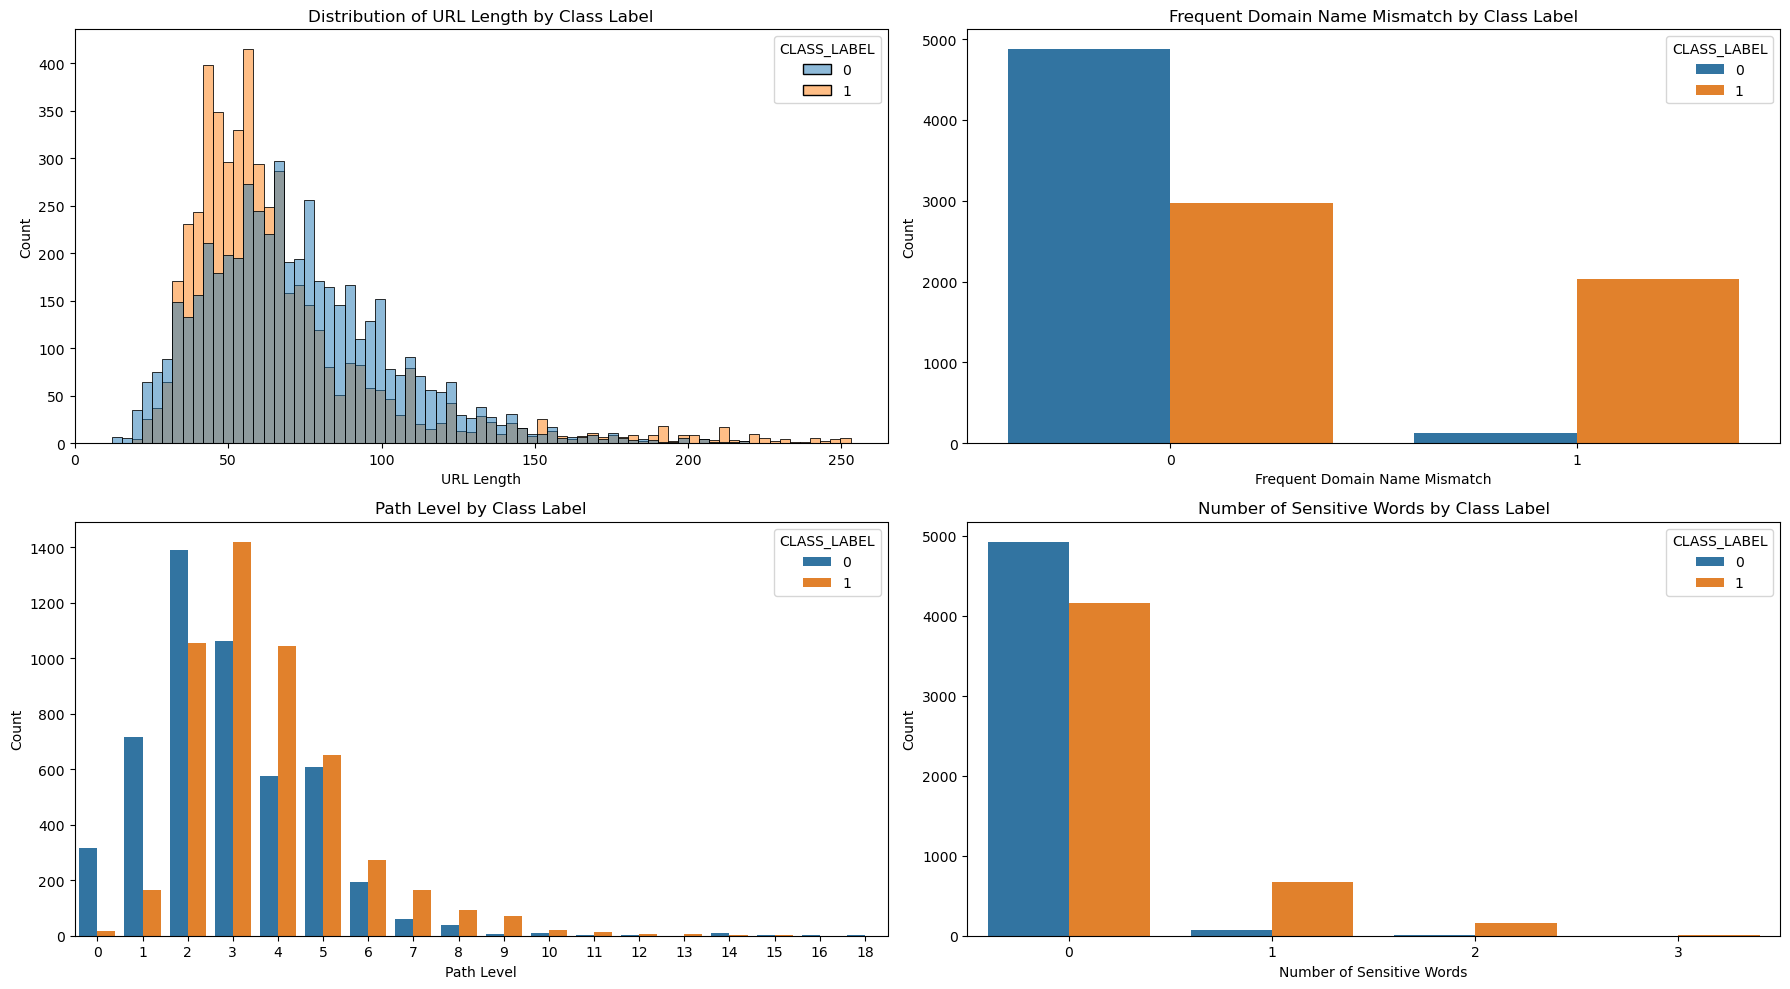

In [205]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

(ax1, ax2), (ax3, ax4) = axes

sns.histplot(data=df, x='UrlLength', hue='CLASS_LABEL', ax=ax1)
ax1.set_title('Distribution of URL Length by Class Label')
ax1.set_xlabel('URL Length')
ax1.set_ylabel('Count')

sns.countplot(data=df, x='FrequentDomainNameMismatch', hue='CLASS_LABEL',ax=ax2)
ax2.set_title('Frequent Domain Name Mismatch by Class Label')
ax2.set_xlabel('Frequent Domain Name Mismatch')
ax2.set_ylabel('Count')

sns.countplot(data=df, x='PathLevel', hue='CLASS_LABEL',ax=ax3)
ax3.set_title('Path Level by Class Label')
ax3.set_xlabel('Path Level')
ax3.set_ylabel('Count')

sns.countplot(data=df, x='NumSensitiveWords', hue='CLASS_LABEL',ax=ax4)
ax4.set_title('Number of Sensitive Words by Class Label')
ax4.set_xlabel('Number of Sensitive Words')
ax4.set_ylabel('Count')

plt.savefig("phishing.png", format='png', dpi=100)
plt.tight_layout()


In [206]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


Text(0.5, 1.0, 'phising vs non-phising ')

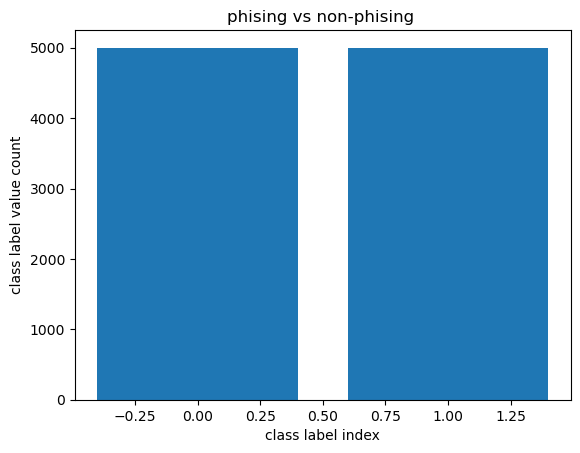

In [207]:
# here we just finding the class label count
import matplotlib.pyplot as plt
classlablect=phishing['CLASS_LABEL'].value_counts()

# here we just creating the plot

plt.bar(classlablect.index,classlablect.values)

plt.xlabel('class label index')
plt.ylabel('class label value count')
plt.title('phising vs non-phising ')

In [208]:
pca = PCA(n_components=2)
pca = PCA(n_components=3)
pca_3d = pca.fit_transform(df.drop(columns='CLASS_LABEL'))
pca_df = pd.DataFrame(pca_3d, columns=['PCA1', 'PCA2', 'PCA3'])
pca_3d = pd.concat([df['CLASS_LABEL'], pca_df], axis=1)

Text(0.5, 0.92, 'Graphical representation with dimensional reduction by diagnosis (PCA)')

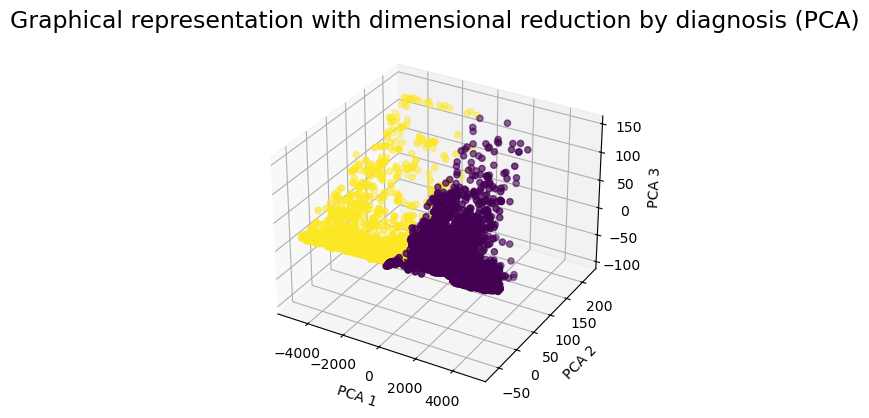

In [209]:
# plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

fg = ax.scatter3D(pca_3d['PCA1'], pca_3d['PCA2'], pca_3d['PCA3'], 
                  c=pca_3d['CLASS_LABEL'], cmap='viridis')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.title('Graphical representation with dimensional reduction by diagnosis (PCA)', fontsize=17)

<Axes: xlabel='PCA1', ylabel='PCA2'>

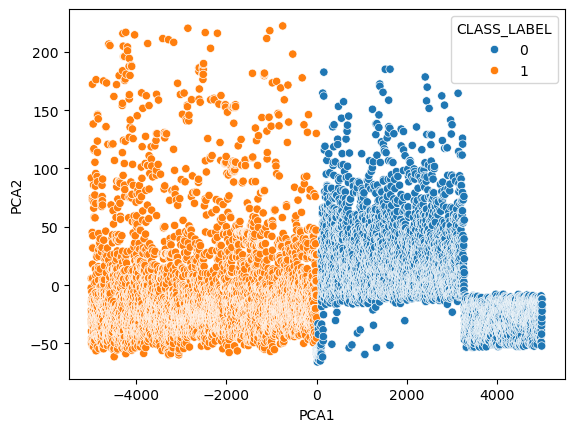

In [210]:
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(df.drop(columns='CLASS_LABEL'))
pca_df2 = pd.DataFrame(pca_2d, columns=['PCA1', 'PCA2'])
pca_2d = pd.concat([df['CLASS_LABEL'], pca_df2], axis=1)

#pca_df = pca_df.rename(columns={0:'PCA1',1:'PCA2',2:'PCA3'})
pca_2d = pca_2d.rename(columns={0:'PCA1',1:'PCA2'})

# plt.figure(figsize=(15,8))
pca_2d_plot = sns.scatterplot(data=pca_2d, x='PCA1', y='PCA2', hue='CLASS_LABEL')
pca_2d_plot


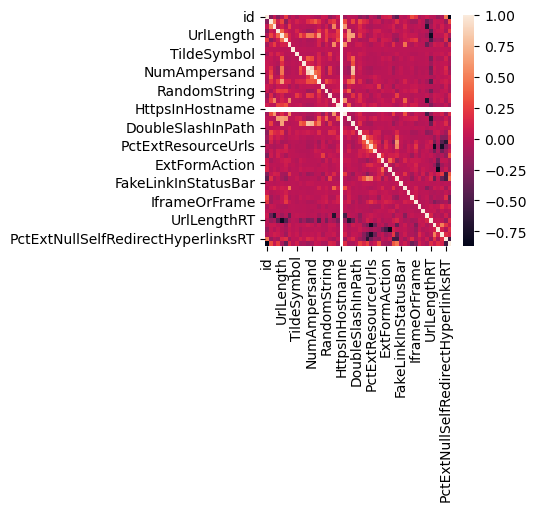

In [218]:
corr = df.corr()
plt.figure(figsize=(3,3))
sns.heatmap(corr)
plt.savefig("heatmap.png", dpi=100)

<Axes: >

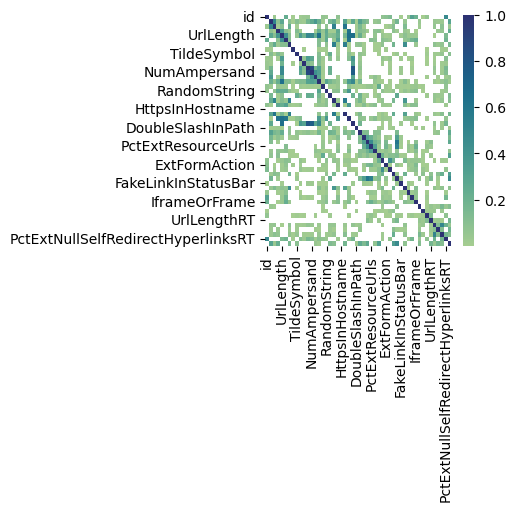

In [220]:
# plt.figure(figsize=(18,10))
plt.figure(figsize=(3,3))
p_corr_matrix = corr.map(lambda x: x if x > 0 else np.nan)
sns.heatmap(data=p_corr_matrix, cmap='crest')

In [223]:
p_corr = pd.DataFrame(corr['CLASS_LABEL']).query('CLASS_LABEL > 0 & CLASS_LABEL != 1').sort_values(by='CLASS_LABEL')*100
corr['CLASS_LABEL'].sort_values(ascending=False)*100

CLASS_LABEL                           100.000000
FrequentDomainNameMismatch             46.395606
PctNullSelfRedirectHyperlinks          34.280619
InsecureForms                          31.637952
NumDots                                29.411137
PctExtHyperlinks                       25.972792
NumSensitiveWords                      25.520807
PathLevel                              22.945039
AbnormalExtFormActionR                 18.579902
UrlLengthRT                            16.951321
HostnameLength                         16.915689
NumDashInHostname                      15.044434
EmbeddedBrandName                      14.178981
IpAddress                              13.229141
MissingTitle                           11.669345
ExtMetaScriptLinkRT                    11.115036
DomainInSubdomains                     10.045238
TildeSymbol                             9.586372
RightClickDisabled                      7.489972
ExtFavicon                              6.914029
PctExtResourceUrlsRT

<Axes: >

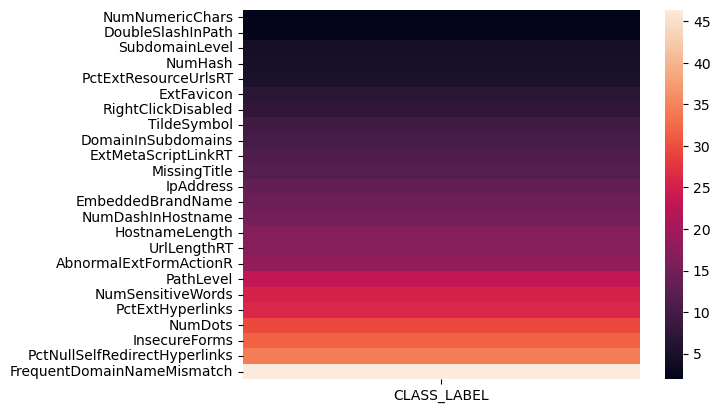

In [224]:
sns.heatmap(data=p_corr)

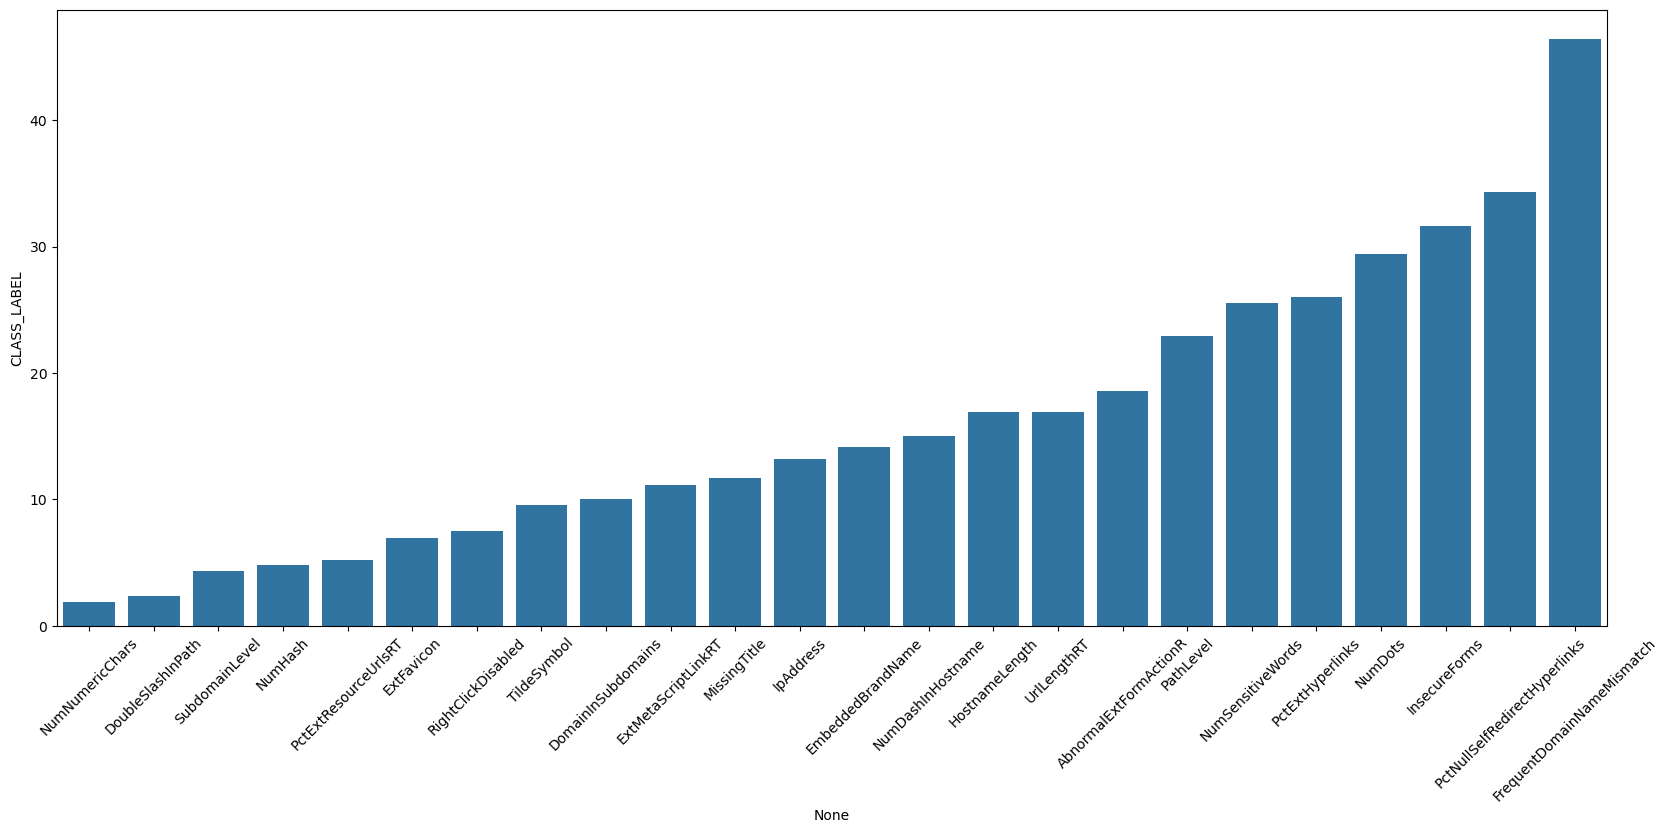

In [225]:
plt.figure(figsize=(20,8))
sns.barplot(data=p_corr, x=p_corr.index,y='CLASS_LABEL')
plt.tick_params(axis='x', labelrotation=45)

In [226]:
X = df.drop(columns='CLASS_LABEL')
y = df['CLASS_LABEL']
model = LogisticRegression(C=6)

In [227]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores):.2f}')

Cross-validation scores: [0.909  0.991  0.9965 0.991  0.791 ]
Mean cross-validation score: 0.94


In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)

In [229]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Regularization: Regularization is a technique used to prevent overfitting by adding a penalty to the loss function. In logistic regression, regularization helps control the complexity of the model by shrinking the coefficients of less important features.

In [230]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9917
F1 Score: 0.9918


Text(0.5, 1.0, 'Confusion Matrix')

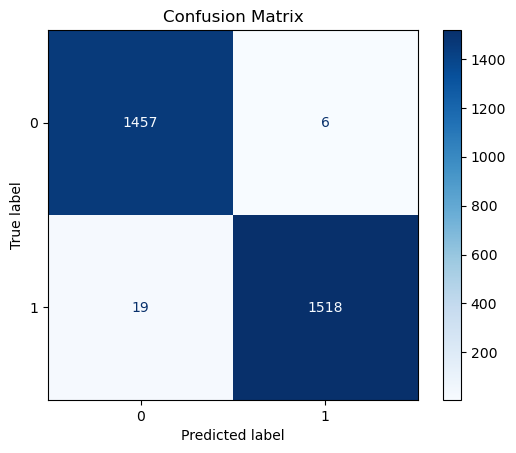

In [231]:
cm = confusion_matrix(y_test, y_pred)

fig = ConfusionMatrixDisplay(confusion_matrix=cm)
fig.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

In [232]:
X_pca = pca_3d.drop(columns='CLASS_LABEL')
y_pca = pca_3d['CLASS_LABEL']

In [233]:
cv_scores = cross_val_score(model, X_pca, y_pca, cv=5, scoring='accuracy')

# Print cross-validation results
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores):.2f}')

Cross-validation scores: [0.7355 1.     1.     1.     0.75  ]
Mean cross-validation score: 0.90


In [234]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3 ,random_state=42)

model.fit(X_train_pca, y_train_pca)
y_pred_pca = model.predict(X_test_pca)

Accuracy on test set: 1.00
F1 Score on test set: 1.00


Text(0.5, 1.0, 'Confusion Matrix')

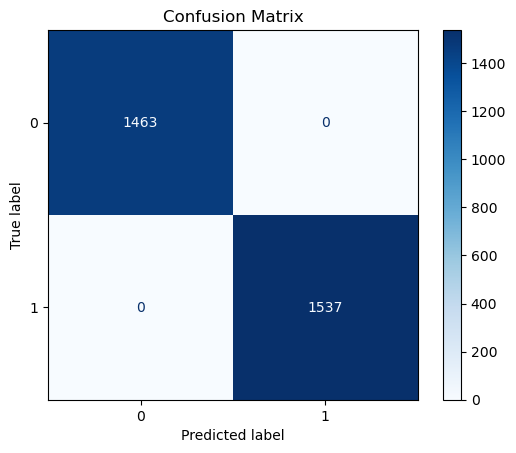

In [235]:
accuracy = accuracy_score(y_test_pca, y_pred_pca)
f1 = f1_score(y_test_pca, y_pred_pca)

print(f'Accuracy on test set: {accuracy:.2f}')
print(f'F1 Score on test set: {f1:.2f}')

cm = confusion_matrix(y_test_pca, y_pred_pca)

fig = ConfusionMatrixDisplay(confusion_matrix=cm)
fig.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

Tested other models (Random Forest, Gaussian Naive Bayes, KNN, SVC) and the results are too good to be true. RF, SVC, KNN are overfitting as the Logistic Regression is doing with PCA. The GNB is not overfitting, which is good, but the results are much worse than LR (92% accuracy vs 98%). So I will stick to the Logistic Regression for this usecase

In [236]:
X_pca_2d = pca_2d.drop(columns='CLASS_LABEL')  

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca_2d)
cluster_labels = kmeans.labels_

df['Cluster'] = cluster_labels

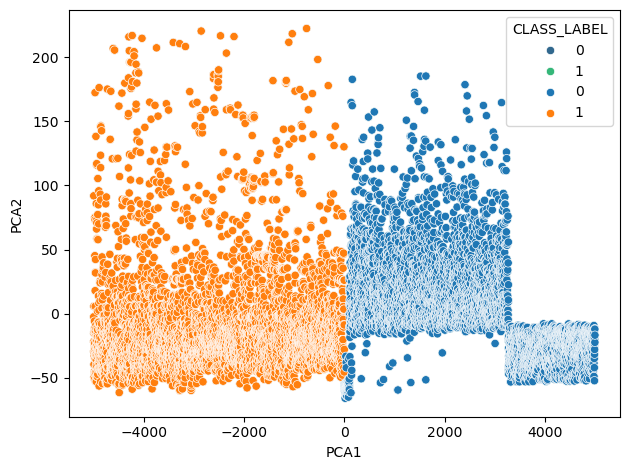

In [237]:
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
custom_palette = ['#1f77b4', '#ff7f0e']


# Plot K-Means clusters
sns.scatterplot(x=X_pca_2d.iloc[:, 0], y=X_pca_2d.iloc[:, 1], hue=cluster_labels, palette='viridis')
ax1.set_title('K-Means Clusters')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.legend(title='Cluster')

# Plot PCA components with true class labels
pca_2d_plot = sns.scatterplot(data=pca_2d, x='PCA1', y='PCA2', hue='CLASS_LABEL',palette=custom_palette)
ax2.set_title('PCA Components with True Labels')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.legend(title='CLASS_LABEL')

# Adjust layout
plt.tight_layout()

In [238]:
df_with_clusters = pd.concat([df, pd.Series(cluster_labels, name='Cluster')], axis=1)
comparison_df = df_with_clusters[['CLASS_LABEL', 'Cluster']]
comparison_df

,CLASS_LABEL,Cluster,Cluster
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
9995,0,1,1
9996,0,1,1
9997,0,1,1
9998,0,1,1


In [239]:
# here we are just finding the target label and feture variable
target=phishing['CLASS_LABEL']
features=phishing.drop(['CLASS_LABEL', 'RelativeFormAction', 'DoubleSlashInPath', 'HttpsInHostname',
                            'DomainInSubdomains', 'FakeLinkInStatusBar', 'RandomString', 'EmbeddedBrandName', 'AtSymbol', 
                            'ImagesOnlyInForm', 'NumHash', 'AbnormalFormAction', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'PopUpWindow', 'RightClickDisabled', 
                            'IpAddress', 'SubdomainLevelRT', 'TildeSymbol'], axis=1)
features

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,NumUnderscore,NumPercent,NumQueryComponents,...,InsecureForms,ExtFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,MissingTitle,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,1,3,1,5,72,0,0,0,0,0,...,1,0,0.000000,0,0,0,0,1,-1,1
1,2,3,1,3,144,0,0,2,0,2,...,1,0,0.000000,0,0,0,0,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,1,0,0.000000,0,0,0,0,1,-1,0
3,4,3,1,6,79,1,0,0,0,0,...,1,0,0.000000,1,1,0,0,1,1,-1
4,5,3,0,4,46,0,0,0,0,0,...,0,1,0.000000,1,0,1,0,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,2,...,1,0,0.000000,0,0,0,0,1,0,1
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0.129032,0,0,1,0,1,0,1
9997,9998,2,1,4,57,0,0,0,0,0,...,1,0,0.056338,0,0,0,0,1,0,1
9998,9999,3,1,1,49,0,0,0,0,1,...,1,0,0.000000,0,0,1,0,1,0,1


In [240]:
# here we just splitting the train and test data of our model
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=42)

In [241]:
# we are just creating the objects

lg_model=LogisticRegression()
sv_model=SVC()
dtc_model=DecisionTreeClassifier()
k_model=KNeighborsClassifier()

In [242]:
#above we split up our data now below we just did the trainig of our model
lg_model.fit(X_train,y_train)
sv_model.fit(X_train,y_train)
dtc_model.fit(X_train,y_train)

# import warnings
# warnings.filterwarnings('ignore')

DecisionTreeClassifier()

In [243]:
X_train

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,NumUnderscore,NumPercent,NumQueryComponents,...,InsecureForms,ExtFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,MissingTitle,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
9254,9255,2,1,2,41,0,0,0,0,0,...,1,1,0.185185,0,0,0,0,0,1,0
1561,1562,3,1,3,40,0,0,0,1,0,...,1,0,0.000000,1,0,0,0,1,-1,1
1670,1671,3,0,4,53,0,0,0,0,0,...,1,0,1.000000,0,0,0,0,1,0,-1
6087,6088,3,1,2,89,12,0,0,0,0,...,1,0,0.027778,0,1,0,0,1,1,1
6669,6670,1,0,4,101,6,0,3,0,1,...,0,0,0.000000,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,2,0,1,60,0,0,0,0,2,...,0,0,0.000000,0,0,0,0,1,0,1
5191,5192,3,1,2,116,1,0,2,1,7,...,1,0,0.000000,0,0,0,0,1,1,1
5390,5391,1,0,5,60,1,0,0,0,0,...,1,0,0.013258,0,1,0,0,1,0,1
860,861,2,0,3,50,0,0,1,0,0,...,1,0,0.000000,0,0,0,0,1,-1,1


In [244]:
X_test

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,NumUnderscore,NumPercent,NumQueryComponents,...,InsecureForms,ExtFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,MissingTitle,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
6252,6253,1,0,3,60,5,0,0,0,0,...,1,0,0.015385,0,0,0,0,1,0,1
4684,4685,3,1,5,75,0,0,0,0,1,...,1,0,0.000000,1,0,0,0,1,-1,-1
1731,1732,1,0,3,64,0,0,0,0,0,...,1,0,0.000000,0,0,0,0,1,1,1
4742,4743,3,0,4,71,0,0,0,0,1,...,1,1,0.000000,1,0,0,0,0,-1,1
4521,4522,3,1,2,52,0,0,0,0,0,...,1,0,0.000000,1,0,0,0,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,6413,3,1,1,99,7,0,2,0,0,...,1,1,0.000000,0,0,1,0,0,-1,1
8285,8286,2,0,2,59,0,0,3,0,0,...,1,0,0.000000,0,1,0,0,1,1,1
7853,7854,1,0,1,67,4,0,0,0,0,...,0,0,0.000000,0,0,0,0,1,0,1
1095,1096,1,0,4,79,1,0,0,0,0,...,1,0,0.000000,0,0,0,0,1,1,1


In [245]:
# here we just making the predictions
lg_pred=lg_model.predict(X_test)
sv_pred=sv_model.predict(X_test)
dt_pred=dtc_model.predict(X_test)
# k_pred=k_model.predict(X_test)

In [246]:
# here we see how our model predict our result

lg_accuracy=accuracy_score(y_test,lg_pred)
sv_accuracy=accuracy_score(y_test,sv_pred)
dt_accuracy=accuracy_score(y_test,dt_pred)
# k_accuracy=accuracy_score(y_test,k_pred)

In [247]:
print('logestic regression accuracy :', lg_accuracy)
print('Support vector accuracy:',sv_accuracy)
print('decision accuracy:',dt_accuracy)
# print('knn accuracy:',k_accuracy)

logestic regression accuracy : 0.9665
Support vector accuracy: 0.999
decision accuracy: 1.0


In [248]:
#here we just creating the roc curve for the predicition which we
#predicted above

from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix

In [249]:
models=['lg_model','sv_model','dtc_model']
predictions=[lg_pred,sv_pred,dt_pred]

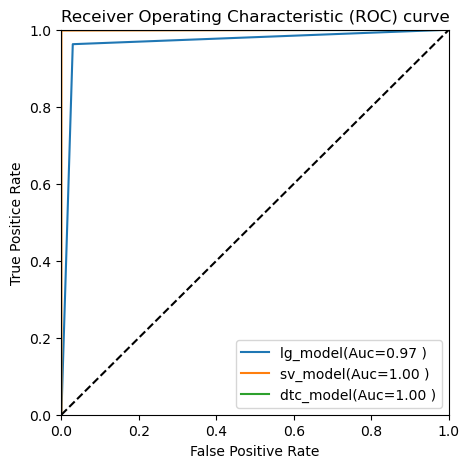

In [250]:
# now we just creating the plot of roccurve based on the our prediction 
plt.figure(figsize=(5,5))
for model,prediction in zip(models,predictions):
    fpr,tpr,_=roc_curve(y_test,prediction)
    auc_score=roc_auc_score(y_test,prediction)
    plt.plot(fpr,tpr,label=model+'(Auc={:.2f} )'.format(auc_score))
plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positice Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

In [142]:
# we just print the confusion matrix for each model
#confusion matrix
#accuracy
#recall
#precision
#f1_score

for model,prediction in zip(models,predictions):
    con_matrix=confusion_matrix(y_test,prediction)
    
    tn,fp,fn,tp=con_matrix.ravel()

    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    
    recall=tp/(tp+fn)
    
    f1_score=2 * precision *recall/ (precision+recall)
    
    print ('Model',model)
    print('Confusion Matrix')
    print(con_matrix)
    
    print('Accuracy',accuracy)
    print('recall',recall)
    print('precision',precision)
    print('f1 score',f1_score)
    print('___________')

Model lg_model
Confusion Matrix
[[959  29]
 [ 38 974]]
Accuracy 0.9665
recall 0.9624505928853755
precision 0.9710867397806581
f1 score 0.9667493796526054
___________
Model sv_model
Confusion Matrix
[[ 988    0]
 [   2 1010]]
Accuracy 0.999
recall 0.9980237154150198
precision 1.0
f1 score 0.9990108803165183
___________
Model dtc_model
Confusion Matrix
[[ 988    0]
 [   0 1012]]
Accuracy 1.0
recall 1.0
precision 1.0
f1 score 1.0
___________
